In [179]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

Модель нейрона Ижикевича:

$$
\frac{d V}{d t} = 0.04 V^2 + 5V + 140 - u + I
$$

$$
\frac{d u}{dt} = a(bV - u)
$$


Конечно разностная схема:

$$
V_{i+1} = (0.04 V_i^2 + 5V_i + 140 - u_i + I) \Delta t + V_{i}
$$

$$
u_{i+1} = a(bV_i - u_i) \Delta t + u_i
$$

Начальные условия:

$$
V_0 = c, u = 0
$$


[35.725339522389696, -71.59797588440819]

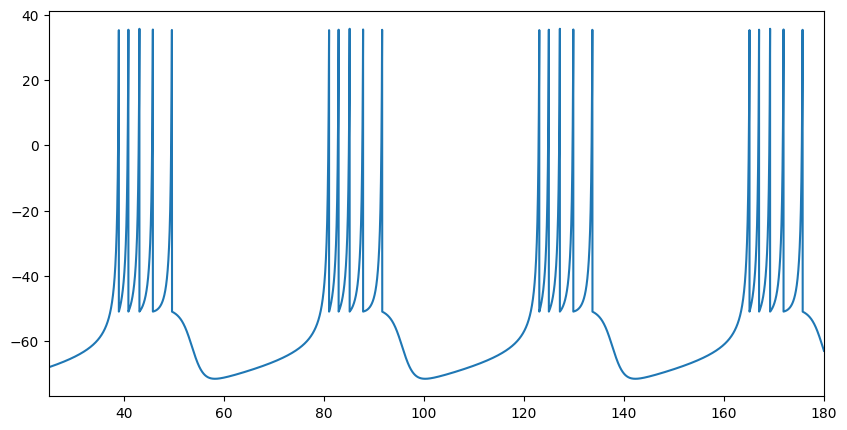

In [193]:
a = 0.02
b = 0.2
c = -51
d = 2
I = 15

V_start = [c]
u_start = [0]

t = np.linspace(0, 200, 100000)
delta_t = t[1] - t[0]
for i in range(len(t) - 1):
    if V_start[i] >= 35:
        V_start.append(c)
        u_start.append(u_start[i] + d)
    else:
        V_start.append((0.04 * V_start[i] ** 2 + 5 * V_start[i] + 140 - u_start[i] + I)* delta_t + V_start[i])
        u_start.append(a * (b * V_start[i] - u_start[i]) * delta_t + u_start[i])

fig, ax = plt.subplots(figsize = [10,5])
ax.plot(t, V_start)
ax.set_xlim([25,180])
#ax.set_ylim([-80,50])

[np.max(V_start), np.min(V_start)]

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

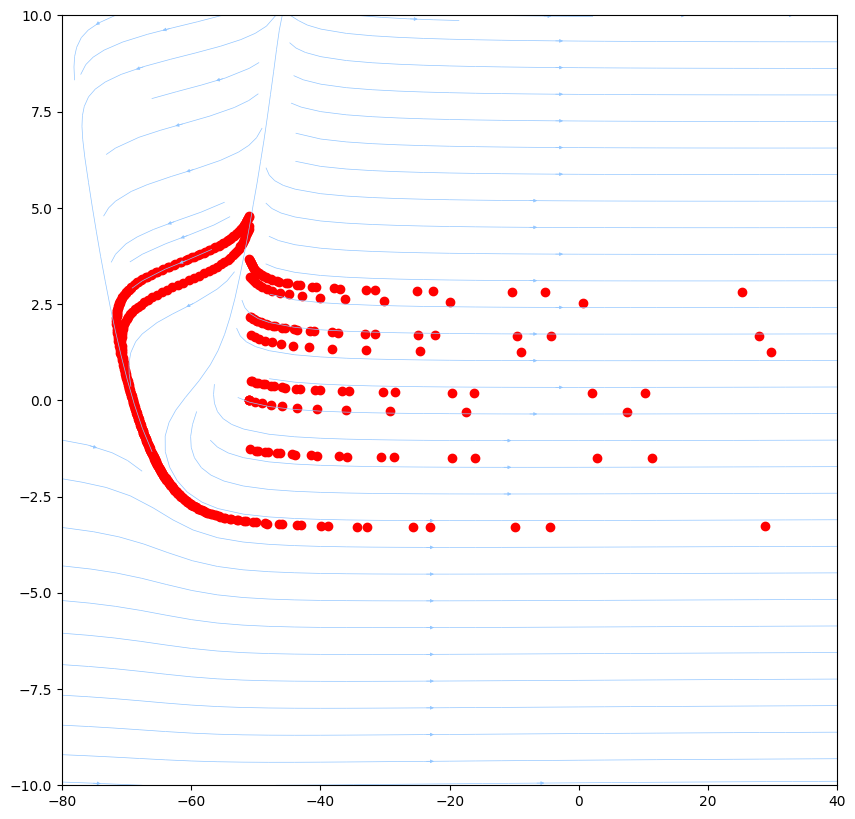

In [207]:
fig, ax = plt.subplots(figsize = [10,10])

v = np.linspace(-80, 40, 100)
u = np.linspace(-10, 10, 100)
V, U = np.meshgrid(v, u)
derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)
ax.streamplot(V,u, derivarive_v, derivarive_u, density= 1, linewidth=0.5, arrowsize = 0.5)
 

def animate(i):
    ax.scatter(V_start[i*100], u_start[i*100], color = 'r')
    return ax.get_lines()

 
anim = FuncAnimation(fig, animate, frames=500, interval=30, blit=True)
 
 
anim.save('sine_wave.gif', writer='imagemagick')

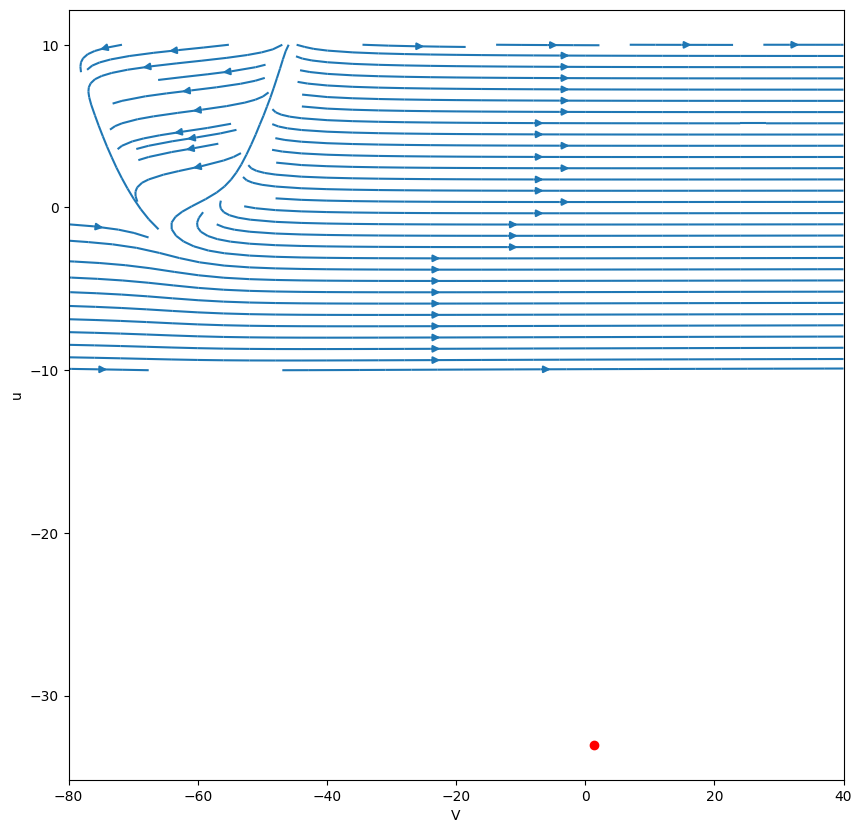

In [ ]:
v = np.linspace(-80, 40, 100)
u = np.linspace(-10, 10, 100)

V, U = np.meshgrid(v, u)


derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)

fig, ax = plt.subplots(figsize = [10,10])
ax.streamplot(V,u, derivarive_v, derivarive_u)
ax.set_xlabel('V')
ax.set_ylabel('u')
plt.savefig('phase.png', dpi = 100, bbox_inches = 'tight')
ax.scatter(u_start[2000], V_start[2000], color = 'r')

In [120]:
a = 0.2
b = 2
c = -56
d = 20
I = -99

a = np.arange(0.005, 0.105, 0.005)
d = np.arange(-10, 1, 1)
t = np.linspace(0, 100, 10000)

all_data = np.array([[0]*len(d)] * len(a), dtype=object)

delta_t = t[1] - t[0]
for k in range(len(d)):
    for j in range(len(a)):
        V = [c]
        u = [0]
        for i in range(len(t)-1):
            if V[i] >= 35:
                V.append(c)
                u.append(u[i] + d[k])
            else:
                V.append((0.04 * V[i] ** 2 + 5 * V[i] + 140 - u[i] + I)* delta_t + V[i])
                u.append(a[j] * (b * V[i] - u[i]) * delta_t + u[i])
        all_data[j][k] = np.array(V)
        

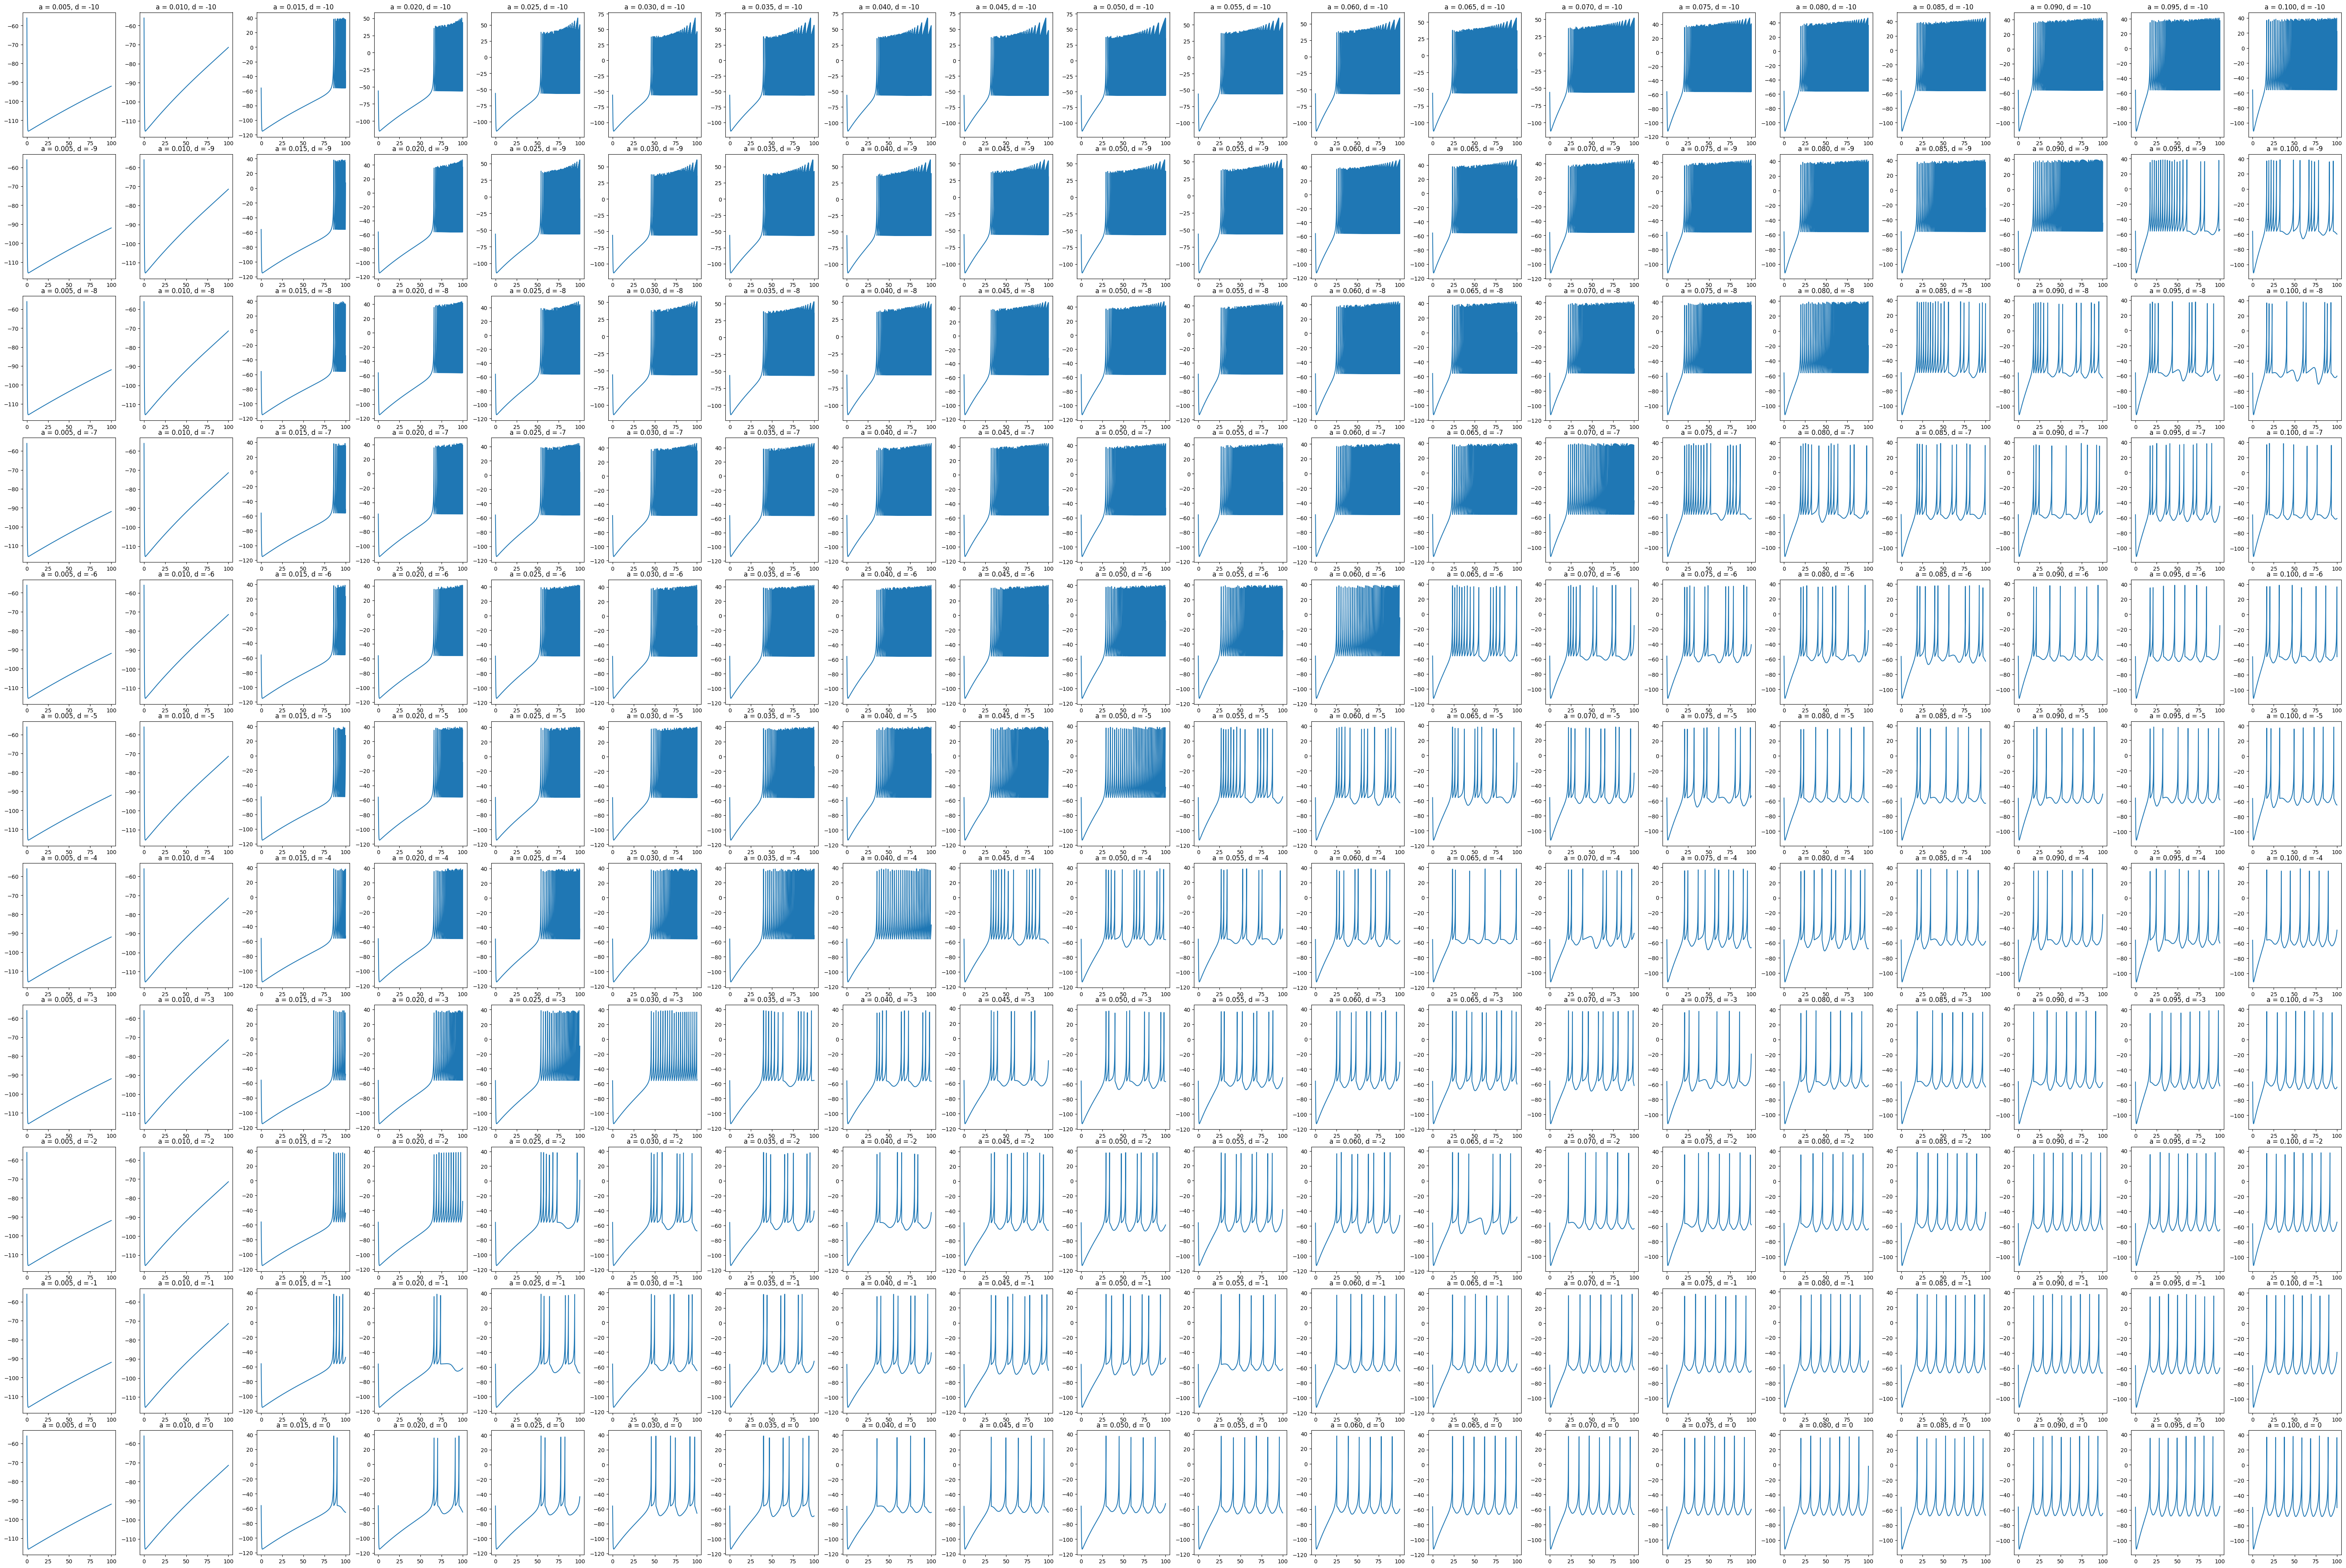

In [121]:
fig, ax = plt.subplots(ncols=len(a), nrows=len(d), figsize = [60,40])
fig.tight_layout()
for k in range(len(d)):
    for j in range(len(a)):
        ax[k][j].plot(t,all_data[j][k])
        ax[k][j].set_title(f'a = {a[j]:.3f}, d = {d[k]:.0f}')
plt.savefig('d_and_a_influence.png', dpi = 100, bbox_inches = 'tight')